In [13]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

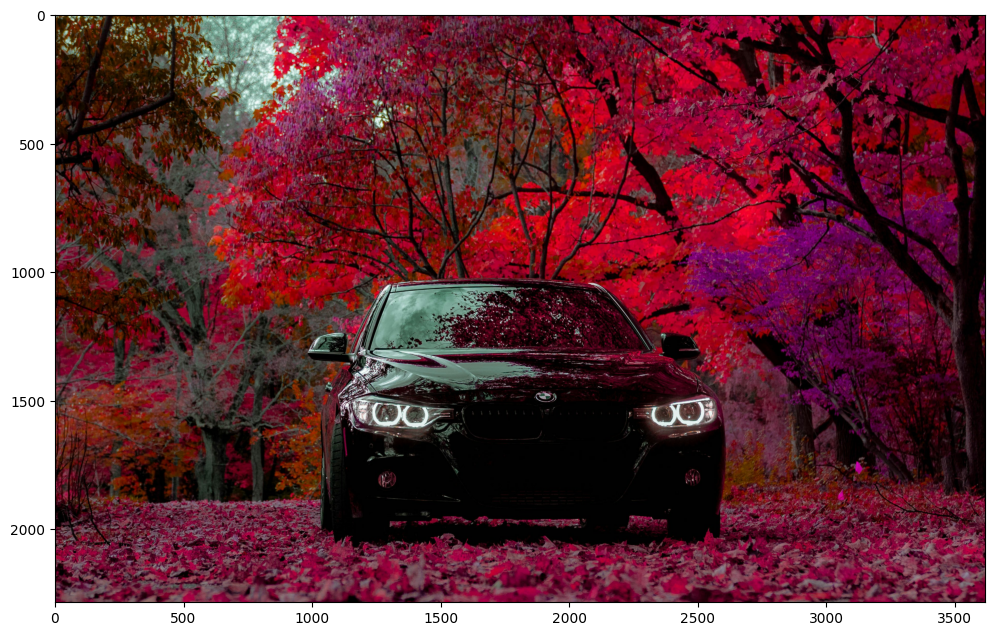

In [27]:
im = imread('car.jpg')
plt.figure(figsize=(12,8))
plt.imshow(im)

In [17]:
img = rgb2gray(imread("car.jpg"))
w, h = img.shape
w,h

(2284, 3617)

In [18]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_identity)

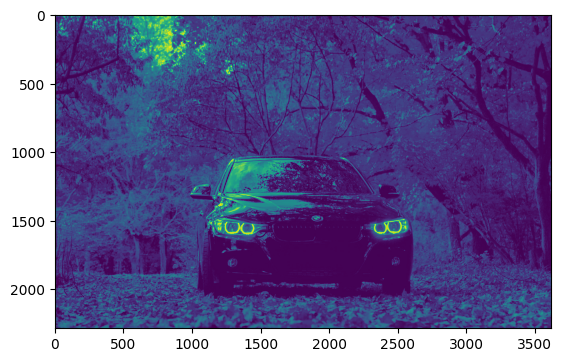

In [19]:
plt.imshow(img1)

In [20]:
tx,ty=50,50
mat_translate = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
img9 = ndi.affine_transform(img, mat_translate)

s_x, s_y = 0.75, 0.75
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img3 = ndi.affine_transform(img, mat_scale)

theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,- w/2],[0,1,-h/2],[0,0,1]])
img4 = ndi.affine_transform(img1, mat_rotate)

mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img2 = ndi.affine_transform(img, mat_reflect)

lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img5 = ndi.affine_transform(img1, mat_shear)

mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
final=ndi.affine_transform(img, mat_all)


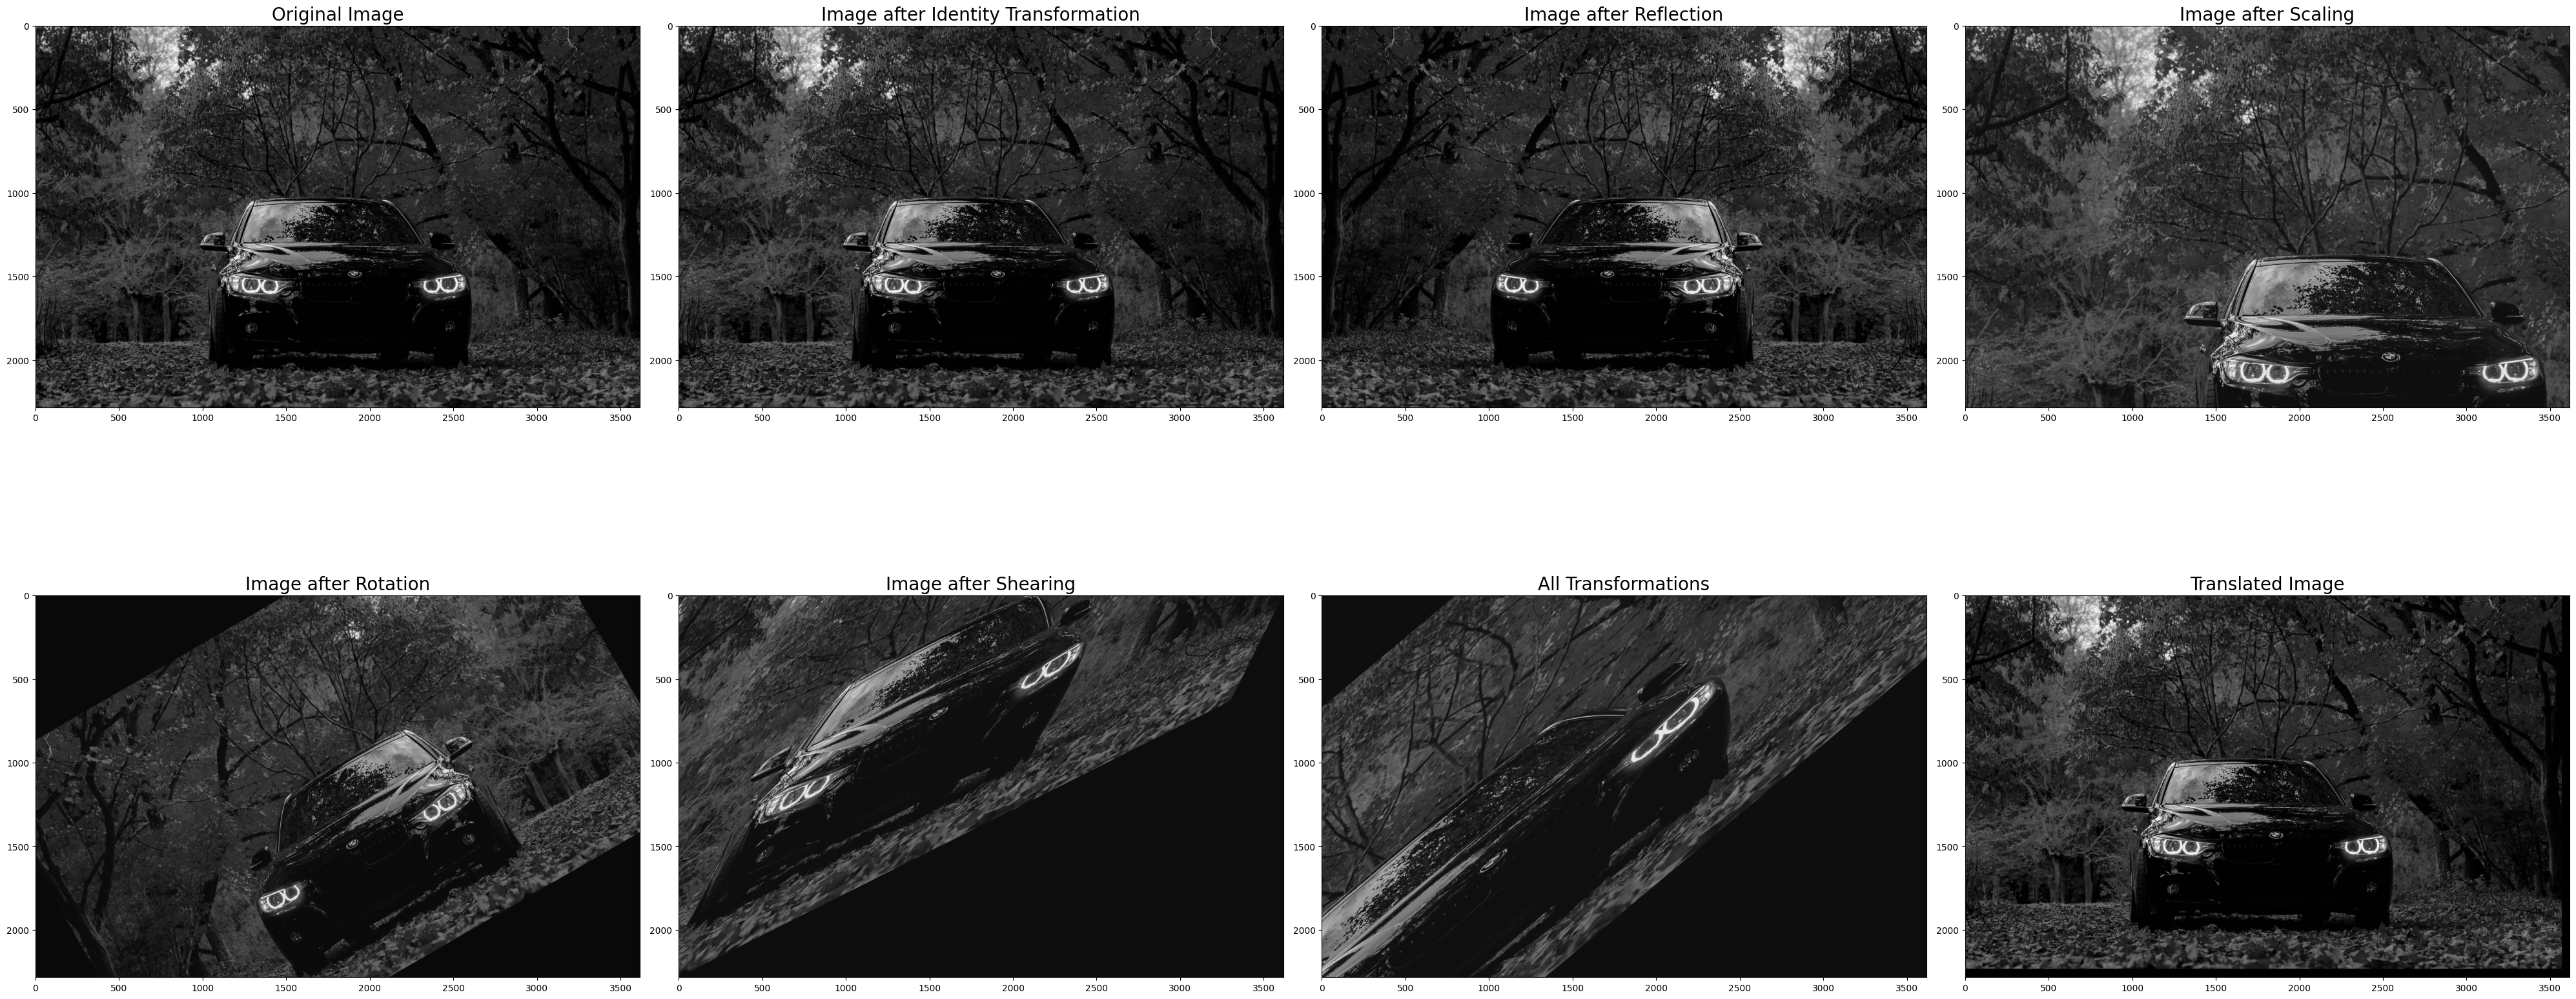

In [24]:


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(40, 20))

ax[0, 0].imshow(img, cmap="gray")
ax[0, 0].set_title('Original Image', fontsize=20)

ax[0, 1].imshow(img1, cmap="gray")
ax[0, 1].set_title('Image after Identity Transformation', fontsize=20)

ax[0, 2].imshow(img2, cmap="gray")
ax[0, 2].set_title('Image after Reflection', fontsize=20)

ax[0, 3].imshow(img3, cmap="gray")
ax[0, 3].set_title('Image after Scaling', fontsize=20)

ax[1, 0].imshow(img4, cmap="gray")
ax[1, 0].set_title('Image after Rotation', fontsize=20)

ax[1, 1].imshow(img5, cmap="gray")
ax[1, 1].set_title('Image after Shearing', fontsize=20)

ax[1, 2].imshow(final, cmap="gray")
ax[1, 2].set_title('All Transformations', fontsize=20)

ax[1, 3].imshow(img9, cmap="gray")
ax[1, 3].set_title('Translated Image', fontsize=20)

plt.tight_layout()
plt.show()
